In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
df_players = pd.read_csv('female_players.csv')
pd.set_option('display.max_columns', 20)

In [ ]:
df_teams = pd.read_csv('female_teams.csv')

In [ ]:
df_players.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,227203,/player/227203/alexia-putellas-segura/240002,24.0,2.0,2023-09-22,Alexia Putellas,Alexia Putellas Segura,"CM, LW",91,91,...,83+3,83+3,83+3,82+3,80+3,76+3,76+3,76+3,80+3,23+3
1,241667,/player/241667/aitana-bonmati-conca/240002,24.0,2.0,2023-09-22,Aitana Bonmatí,Aitana Bonmatí Conca,CM,90,92,...,83+3,83+3,83+3,81+3,79+3,75+3,75+3,75+3,79+3,21+3
2,227102,/player/227102/caroline-graham-hansen/240002,24.0,2.0,2023-09-22,C. Hansen,Caroline Graham Hansen,RW,90,90,...,68+3,68+3,68+3,71+3,67+3,60+3,60+3,60+3,67+3,20+3
3,227125,/player/227125/sam-kerr/240002,24.0,2.0,2023-09-22,S. Kerr,Samantha May Kerr,ST,90,90,...,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3
4,236479,/player/236479/maria-pilar-leon-cebrian/240002,24.0,2.0,2023-09-22,Mapi León,María Pilar León Cebrián,CB,89,90,...,86+3,86+3,86+3,85+3,86+3,88+2,88+2,88+2,86+3,20+3


In [ ]:
# Observar si hay datos faltantes
nulls_players = df_players.isnull().sum()
nulls_players = nulls_players[nulls_players > 0].sort_values(ascending=False)
nulls_players

,0
club_loaned_from,5008
goalkeeping_speed,4419
player_tags,4375
player_traits,2988
club_joined_date,2817
club_name,2790
league_name,2790
league_level,2790
league_id,2790
club_team_id,2790


Se observa como hay varias observaciones con valores ausentes en algunas columnas.

Aquellas variables relacionadas con la pertenencia a un club tienen 2790 valores nulos, por lo que se presupone, que no dispondrán de un club, así que se especificará en el dataset que no pertenecen a ningun cub mediante 'Sin club'.

Otros datos ausentes son los del club de cesión, donde aquellas jugadoras que no has sido cedidas, tendrán un valor de 'No cedida'

Las variable goalkeeping_speed corresponde a una habilidad específica de porteras, por tanto, a aquellas jugadoras que no sean porteras esta estadística no les aplica.

Para tratar algunos valores ausentes se ha decidido separar a las jugadoras con club y aquellas sin club.

Sin embargo, antes se realizarán algunas transformaciones que se considera que son independientes al hecho de tener un club o no.

In [ ]:
# Para confirmar la hipótesis de que goalkeeping_speed corresponde únicamente a las porteras
(~df_players['player_positions'].str.contains('GK', na=False)).sum()
# El número de jugadoras no porteras coincide con el número de valores faltantes en la columna goalkeeping_speed
# Por lo que se confirma la hipótesis y estos valores ausentes son intencionados
# De momento no se tratarán ya que al ser un valor numérico, distorsionaria las estadísticas, sin embargo,
# si se requiere en un futuro se tratará indicando el valor -1

np.int64(4419)

In [ ]:
# Para rellenar la columna de club de cesión
df_players['club_loaned_from'] = df_players['club_loaned_from'].fillna('No cedida')
df_players['club_loaned_from'].isnull().sum()

np.int64(0)

In [ ]:
# Se deduce que aquellas jugadoras sin player_tag o player_traits, es porque no disopnen de una habilidad especial destacable
print(df_players['player_tags'].unique())
print(df_players['player_traits'].unique())
# Por lo que se ha decidido rellenar los valores ausentes con 'Sin tags' o 'Sin traits'
df_players['player_tags'] = df_players['player_tags'].fillna('Sin tags')
df_players['player_traits'] = df_players['player_traits'].fillna('Sin traits')

['#Dribbler, #Playmaker, #Distance shooter, #Crosser, #FK Specialist, #Acrobat, #Clinical finisher, #Complete midfielder, #Complete forward'
 '#Dribbler, #Playmaker, #Tactician, #Acrobat, #Clinical finisher, #Complete midfielder, #Complete forward'
 '#Dribbler, #Distance shooter, #Crosser, #Acrobat, #Clinical finisher, #Complete forward'
 '#Aerial threat, #Dribbler, #Engine, #Acrobat, #Clinical finisher, #Complete forward'
 '#Distance shooter, #Crosser, #FK Specialist, #Tackling, #Tactician\xa0'
 '#Clinical finisher'
 '#Aerial threat, #Clinical finisher, #Complete forward'
 '#Dribbler, #Acrobat, #Clinical finisher, #Complete forward'
 '#Dribbler, #Distance shooter'
 '#Speedster, #Dribbler, #Clinical finisher, #Complete forward'
 '#Aerial threat, #Distance shooter, #Strength, #Clinical finisher, #Complete forward'
 '#Dribbler, #Playmaker, #Acrobat, #Complete midfielder'
 '#Tackling, #Tactician\xa0' '#Aerial threat, #Tactician, #Strength'
 '#Playmaker, #Acrobat' nan
 '#Tackling, #Tactici

El resto de variables ausentes se contextualizarán segun si la jugadora dispone de club o no.

In [ ]:
# Se crean dos conjuntos de datos, una con las jugadoras que tienen club y otro con las que no.
jugadoras_sin_club = df_players[df_players['club_name'].isnull()]
jugadoras_con_club = df_players[df_players['club_name'].notnull()]

In [ ]:
print(jugadoras_sin_club.shape)
nulls_players_sin_club = jugadoras_sin_club.isnull().sum()
nulls_players_sin_club = nulls_players_sin_club[nulls_players_sin_club > 0].sort_values(ascending=False)
nulls_players_sin_club

(2790, 109)


,0
club_name,2790
club_team_id,2790
league_name,2790
league_id,2790
club_jersey_number,2790
club_joined_date,2790
league_level,2790
club_position,2790
club_contract_valid_until_year,2790
wage_eur,2744


En el conjunto de datos de jugadoras sin club se observan 4 tipos de valores ausentes.
1. Aquellos que son causados por la ausencia de club, son aquellas columnas con 2790 valores ausentes.
2. Aquellas columnas relacionadas con aspectos económicos, que tienen 2744 valores nulos, 46 valores nulos menos que aquellas sin club(se analizarán por separado)
3. goalkeeping_speed, ya se ha mencionado en el apartado anterior
4. Aquellas columnas con estadísticas técnicas, tienen 358 valores nulos.
5. La columna mentality_composure que tiene 271 valores nulos.

Estos valores nulos se analizarán por separado, con el objetivo de intentar averiguar si se pueden imputar con algun valor o si son intencionados.

In [ ]:
# Primero se intentará determinar la razón por la cúal existen estos 271 valores nulos
jugadoras_sin_club_mentality = jugadoras_sin_club[jugadoras_sin_club['mentality_composure'].isnull()]
nulls_players_sin_club = jugadoras_sin_club_mentality.isnull().sum()
nulls_players_sin_club = nulls_players_sin_club[nulls_players_sin_club > 0].sort_values(ascending=False)
nulls_players_sin_club

,0
value_eur,271
wage_eur,271
club_team_id,271
club_name,271
league_id,271
league_name,271
league_level,271
club_position,271
club_jersey_number,271
club_joined_date,271


In [ ]:
# Se ha detectado un patrón donde todas las jugadoras que no disponen de ningun valor en la columna mentality_composure
# Parece que su fifa_version es la 16
jugadoras_sin_club_mentality

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
4764,226324,/player/226324/carli-lloyd/160002,16.0,2.0,2015-09-21,C. Lloyd,Carli Anne Hollins,"CM, CAM, LM, ST",91,91,...,86+3,86+3,86+3,83+3,83+3,82+3,82+3,82+3,83+3,19+3
4765,226328,/player/226328/megan-rapinoe/160002,16.0,2.0,2015-09-21,M. Rapinoe,Megan Anna Rapinoe,"LM, CM",90,90,...,68+3,68+3,68+3,71+3,66+3,56+3,56+3,56+3,66+3,19+3
4766,226334,/player/226334/abby-wambach/160002,16.0,2.0,2015-09-21,A. Wambach,Abby Wambach,ST,90,90,...,59+3,59+3,59+3,57+3,55+3,55+3,55+3,55+3,55+3,20+3
4767,226362,/player/226362/louisa-necib/160002,16.0,2.0,2015-09-21,L. Nécib,Louisa Nécib,"LM, CAM",90,90,...,71+3,71+3,71+3,73+3,69+3,61+3,61+3,61+3,69+3,20+3
4768,226373,/player/226373/nadine-kessler/160002,16.0,2.0,2015-09-21,N. Keßler,Nadine Keßler,CM,89,89,...,83+3,83+3,83+3,81+3,80+3,79+3,79+3,79+3,80+3,20+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,227485,/player/227485/valeria-miranda/160002,16.0,2.0,2015-09-21,V. Miranda,Valeria Aurora Miranda Rodriguez,LB,64,72,...,60,60,60,62,64,65,65,65,64,17
5031,227385,/player/227385/nkem-ezurike/160002,16.0,2.0,2015-09-21,N. Ezurike,Nkem Ezurike,ST,64,71,...,41,41,41,44,41,37,37,37,41,19
5032,228160,/player/228160/linda-tucceri-cimini/160002,16.0,2.0,2015-09-21,L. Tucceri Cimini,Linda Tucceri Cimini,"LB, CB",64,71,...,64,64,64,62,64,68,68,68,64,16
5033,228723,/player/228723/fabiola-ibarra/160002,16.0,2.0,2015-09-21,F. Ibarra,Claudia Fabiola Ibarra Muro,LM,63,68,...,43,43,43,48,45,36,36,36,45,14


In [ ]:
# Para comprovar esto creamos un dataset filtrado por fifa_verisio 16.0 y lo comparamos
fifa_16 = jugadoras_sin_club[jugadoras_sin_club['fifa_version']== 16.0]
set(jugadoras_sin_club_mentality['player_id']) == set(fifa_16['player_id'])
# Con esto se confirma que la razón por la que la columna mentality_composure es nula se debe a que la versión de fifa 16, no registraba este atributo
# Al ser una columna de carácter float, de momento no se imputarán los valores nulos por el momento.
# Si más adelante se considera una variable relevante en el modelo de regresión, se considerará si eliminar o imputar los datos.

True

A continuación se analizarán aquellas jugadoras sin estadísticas técnicas

In [ ]:
# Como se podía intuir todas las jugadoras sin estadísticas técnicas son las mismas, se intuye que el motivo es que son porteras
jugadoras_sin_club_estadisticas = jugadoras_sin_club[jugadoras_sin_club['pace'].isnull()]
nulls_players_sin_club = jugadoras_sin_club_estadisticas.isnull().sum()
nulls_players_sin_club = nulls_players_sin_club[nulls_players_sin_club > 0].sort_values(ascending=False)
nulls_players_sin_club

,0
club_team_id,358
league_id,358
club_name,358
pace,358
shooting,358
league_name,358
league_level,358
club_position,358
club_jersey_number,358
club_joined_date,358


In [ ]:
# Con esta línea de código se confirma que aquellas jugadoras sin estadísticas técnicas son todas porteras
# Por lo que estas estadísticas no se definen
jugadoras_sin_club_estadisticas['player_positions'].unique()

array(['GK'], dtype=object)

A continuación se analizarán aquellas jugadoras con valores ausentes en las columnas relacionadas con aspectos económicos.

In [ ]:
# Se obtiene el dataset de las jugadoras sin equipo y sin valores en las columnas de aspectos económicos
jugadoras_sin_club_eco = jugadoras_sin_club[jugadoras_sin_club['wage_eur'].isnull()]
nulls_players_sin_club = jugadoras_sin_club_eco.isnull().sum()
nulls_players_sin_club = nulls_players_sin_club[nulls_players_sin_club > 0].sort_values(ascending=False)
nulls_players_sin_club

,0
value_eur,2744
wage_eur,2744
club_team_id,2744
club_name,2744
league_id,2744
league_name,2744
league_level,2744
club_position,2744
club_jersey_number,2744
club_joined_date,2744


In [ ]:
# Creamos este loop para intentar detectar aquellas columnas donde el valor es exactamente el mismo
for i in jugadoras_sin_club_eco.columns:
  if len(jugadoras_sin_club_eco[i].unique()) == 1:
    print(f'La columna es {i} y los valores únicos son: {jugadoras_sin_club_eco[i].unique()}')
  else:
    pass
# Se puede observar como todas las columnas con un único valor no tienen relevancia ya que son valores nulos

La columna es fifa_update y los valores únicos son: [2.]
La columna es value_eur y los valores únicos son: [nan]
La columna es wage_eur y los valores únicos son: [nan]
La columna es club_team_id y los valores únicos son: [nan]
La columna es club_name y los valores únicos son: [nan]
La columna es league_id y los valores únicos son: [nan]
La columna es league_name y los valores únicos son: [nan]
La columna es league_level y los valores únicos son: [nan]
La columna es club_position y los valores únicos son: [nan]
La columna es club_jersey_number y los valores únicos son: [nan]
La columna es club_loaned_from y los valores únicos son: ['No cedida']
La columna es club_joined_date y los valores únicos son: [nan]
La columna es club_contract_valid_until_year y los valores únicos son: [nan]
La columna es release_clause_eur y los valores únicos son: [nan]


In [ ]:
# Analicemos ahora el dataset de las observaciones que si tienen valores en las columnas de aspectos económicos
jugadoras_sin_club_si_eco = jugadoras_sin_club[jugadoras_sin_club['wage_eur'].notnull()]
for i in jugadoras_sin_club_si_eco.columns:
  if len(jugadoras_sin_club_si_eco[i].unique()) == 1:
    print(f'La columna es {i} y los valores únicos son: {jugadoras_sin_club_si_eco[i].unique()}')
  else:
    pass
print(df_players[df_players['nation_position'] == '-1'][['nationality_name']])
# Parece que son jugadoras que no tienen club pero juegan en alguna nación, concretamente la de Bélgica y Portugal
# Por lo que serán jugadoras con un valor económico dado que se encuentran en su equipo nacional
# Puede que no hayan debutado todavía y no tengan la posición y el número de la camiseta seleccionado y por eso salga como '-1'

La columna es fifa_version y los valores únicos son: [22.]
La columna es fifa_update y los valores únicos son: [2.]
La columna es update_as_of y los valores únicos son: ['2021-09-23']
La columna es club_team_id y los valores únicos son: [nan]
La columna es club_name y los valores únicos son: [nan]
La columna es league_id y los valores únicos son: [nan]
La columna es league_name y los valores únicos son: [nan]
La columna es league_level y los valores únicos son: [nan]
La columna es club_position y los valores únicos son: [nan]
La columna es club_jersey_number y los valores únicos son: [nan]
La columna es club_loaned_from y los valores únicos son: ['No cedida']
La columna es club_joined_date y los valores únicos son: [nan]
La columna es club_contract_valid_until_year y los valores únicos son: [nan]
La columna es nation_position y los valores únicos son: ['-1']
La columna es nation_jersey_number y los valores únicos son: [-1.]
La columna es real_face y los valores únicos son: ['No']
La co

Por lo tanto aquellas jugadoras sin club, a excepción de estas 46 que juegan en el equipo nacional, no disponen de información económica. Así que parece que el valor ausente es intencionado.

In [ ]:
# Finalmente se van a transformar las columnas que tengan valores nulos que estén relacionadas con pertenecer a un club
jugadoras_sin_club['club_name'] = jugadoras_sin_club['club_name'].fillna('Sin club')
jugadoras_sin_club['club_team_id'] = jugadoras_sin_club['club_name'].fillna(-1) # aunque sea una variable numérica sus estadísticas son irrelevantes ya que se trata de un identificador
jugadoras_sin_club['league_name'] = jugadoras_sin_club['league_name'].fillna('Sin liga')
jugadoras_sin_club['league_id'] = jugadoras_sin_club['league_id'].fillna(-1) # idem
jugadoras_sin_club['club_jersey_number'] = jugadoras_sin_club['league_name'].fillna(-1)# idem
jugadoras_sin_club['league_level'] = jugadoras_sin_club['league_level'].fillna(-1)# idem
jugadoras_sin_club['club_position'] = jugadoras_sin_club['club_position'].fillna('-1')# idem

# Las variables 'club_joined_date' y 'club_contract_valid_until_year', no se transformarán ya que la antigüedad de un contrato o la antigüedad en un club, pueden ser factores importantes a la hora de calcular lo que ganan


<ipython-input-193-50be35e5a8f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jugadoras_sin_club['club_name'] = jugadoras_sin_club['club_name'].fillna('Sin club')
<ipython-input-193-50be35e5a8f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jugadoras_sin_club['club_team_id'] = jugadoras_sin_club['club_name'].fillna(-1) # aunque sea una variable numérica sus estadísticas son irrelevantes ya que se trata de un identificador
<ipython-input-193-50be35e5a8f5>:4: SettingWithCopyWarning: 
A value is trying

In [ ]:
nulls_players_sin_club = jugadoras_sin_club.isnull().sum()
nulls_players_sin_club = nulls_players_sin_club[nulls_players_sin_club > 0].sort_values(ascending=False)
nulls_players_sin_club

,0
club_joined_date,2790
club_contract_valid_until_year,2790
value_eur,2744
wage_eur,2744
release_clause_eur,2744
goalkeeping_speed,2432
pace,358
passing,358
shooting,358
dribbling,358


En conclusión aunque el número de valores ausentes no haya vairado de forma considerable, ahora tenemos detectadas todas las razones por las que estos NA existen.

In [ ]:
# A continuación se analizará el conjunto de datos de jugadoras que están en un equipo y sus valores nulos
nulls_players_con_club = jugadoras_con_club.isnull().sum()
nulls_players_con_club = nulls_players_con_club[nulls_players_con_club > 0].sort_values(ascending=False)
nulls_players_con_club

,0
goalkeeping_speed,1987
nation_jersey_number,1917
nation_position,1917
nation_team_id,1917
pace,258
defending,258
dribbling,258
passing,258
shooting,258
physic,258


En el conjunto de datos de jugadoras sin club se observan 4 tipos de valores ausentes.

1. goalkeeping_speed, ya se ha mencionado en el apartado anterior

2. Aquellas columnas relacionadas con la 'nation' con valores ausentes, probablemente sean jugadoras que no han sido llamadas para jugar en su equipo nacional.

3. Tal y como hemos visto en el apartado anterior las variables relacionadas con estadísticas técnicas seguramente se deban a que las jugadoras en cuestión son porteras, aun así, vamos a comprovarlo.

4. Finalmente las 3 últimas variables se analizarán de manera independiente.

In [ ]:
jugadoras_con_club['nation_team_id'].unique()

array([113012., 113007.,     nan, 113009., 113003., 113004., 113008.,
       113002., 113011., 113000., 113984., 116428., 113010., 115682.,
       113394., 113996.])

In [ ]:
jugadoras_con_club['nation_jersey_number'] = jugadoras_con_club['nation_jersey_number'].fillna(-2) # Se especifica -2 y no -1, ya que en el apartado anterior hemos visto como hay jugadoras sin club pero que con equipo nacional que tienen -1 especificado en este campo
jugadoras_con_club['nation_position'] = jugadoras_con_club['nation_position'].fillna(-1) # idem
jugadoras_con_club['nation_team_id'] = jugadoras_con_club['nation_team_id'].fillna(-1) # aunque sea una variable numérica sus estadísticas son irrelevantes ya que se trata de un identificador

<ipython-input-197-c86b8b451a87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jugadoras_con_club['nation_jersey_number'] = jugadoras_con_club['nation_jersey_number'].fillna(-2) # Se especifica -2 y no -1, ya que en el apartado anterior hemos visto como hay jugadoras sin club pero que con equipo nacional que tienen -1 especificado en este campo
<ipython-input-197-c86b8b451a87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jugadoras_con_club['nation_position'] = jugadoras_con_club['nation_position'].fi

In [ ]:
# Con esto confirmamos lo mismo que con el conjunto de datos de jugadoras sin club
jugadoras_con_club_porteras = jugadoras_con_club[jugadoras_con_club['player_positions'].str.contains('GK', na=False)]
jugadoras_con_club_sin_stats = jugadoras_con_club[jugadoras_con_club['pace'].isnull()]
set(jugadoras_con_club_porteras['player_id']) == set(jugadoras_con_club_sin_stats['player_id'])

True

In [ ]:
# No hay ninguna jugadora con una clausuda de rescisión de 0 €
np.sort(jugadoras_con_club['release_clause_eur'].unique())

array([2.280e+05, 3.190e+05, 3.360e+05, 3.600e+05, 3.840e+05, 4.320e+05,
       4.600e+05, 5.650e+05, 6.260e+05, 6.500e+05, 7.480e+05, 7.610e+05,
       7.680e+05, 7.800e+05, 8.400e+05, 8.530e+05, 8.860e+05, 9.000e+05,
       9.100e+05, 9.180e+05, 9.200e+05, 9.350e+05, 9.360e+05, 9.600e+05,
       9.890e+05, 9.900e+05, 1.000e+06, 1.100e+06, 1.200e+06, 1.300e+06,
       1.400e+06, 1.500e+06, 1.600e+06, 1.700e+06, 1.800e+06, 1.900e+06,
       2.000e+06, 2.100e+06, 2.200e+06, 2.300e+06, 2.400e+06, 2.500e+06,
       2.600e+06, 2.700e+06, 2.800e+06, 2.900e+06, 3.000e+06, 3.100e+06,
       3.200e+06, 3.300e+06, 3.400e+06, 3.500e+06, 3.600e+06, 3.700e+06,
       3.800e+06, 3.900e+06, 4.000e+06, 4.100e+06, 4.200e+06, 4.300e+06,
       4.400e+06, 4.500e+06, 4.600e+06, 4.700e+06, 4.800e+06, 4.900e+06,
       5.000e+06, 5.100e+06, 5.200e+06, 5.300e+06, 5.400e+06, 5.500e+06,
       5.700e+06, 5.800e+06, 5.900e+06, 6.000e+06, 6.100e+06, 6.200e+06,
       6.300e+06, 6.400e+06, 6.500e+06, 6.600e+06, 

In [ ]:
# Ahora analizaremos aquellas jugadoras con valores ausentes en 'release_clause_eur'
jugadoras_con_club_sin_claus = jugadoras_con_club[jugadoras_con_club['release_clause_eur'].isnull()]
for i in jugadoras_con_club_sin_claus.columns:
  if len(jugadoras_con_club_sin_claus[i].unique()) == 1:
    print(f'La columna es {i} y los valores únicos son: {jugadoras_con_club_sin_claus[i].unique()}')
  else:
    pass
# Parece que no hay ninguna columna que relacione a estas jugadoras.
# Por si a caso se analizará si 'club_joined_date' tiene relación, dado que el número de datos faltantes es muy parecido

La columna es fifa_update y los valores únicos son: [2.]
La columna es league_level y los valores únicos son: [1.]
La columna es release_clause_eur y los valores únicos son: [nan]


In [ ]:
 # Finalmente se observa como todas las jugadoras a excepto de una no tienen una fecha de entrada al club, por lo que puede que todavía no les hayan puesto la cláusula de rescisión
jugadoras_con_club[jugadoras_con_club['release_clause_eur'].isnull()][['release_clause_eur', 'club_joined_date', 'long_name']]
# La jugadora que tiene fecha de entrada al club se intuye que puede también no tener datos en la variable 'value_eur', así que se va a comprovar

,release_clause_eur,club_joined_date,long_name
101,NaN,NaN,Vanessa Brigitte Gilles
112,NaN,2013-01-11,Christine Margaret Sinclair
382,NaN,NaN,Nikola Karczewska
457,NaN,NaN,Alejandra Bernabé de Santiago
459,NaN,NaN,Lea Karólína Vilhjálmsdóttir
556,NaN,NaN,Pia-Sophie Wolter
901,NaN,NaN,Jimena López Fuentes
911,NaN,NaN,Kaylan Marckese
1078,NaN,NaN,Bénédicte Simon
1124,NaN,NaN,Emilie Bragstad


In [ ]:
# Así es, parece que la jugadora Christine Margaret Sinclair, tiene datos faltantes no intencionados, se imputarán los datos faltantes en base a la media de su equipo
jugadoras_con_club[jugadoras_con_club['release_clause_eur'].isnull()][['release_clause_eur', 'club_joined_date', 'long_name', 'value_eur']]

,release_clause_eur,club_joined_date,long_name,value_eur
101,NaN,NaN,Vanessa Brigitte Gilles,41000000.0
112,NaN,2013-01-11,Christine Margaret Sinclair,NaN
382,NaN,NaN,Nikola Karczewska,28500000.0
457,NaN,NaN,Alejandra Bernabé de Santiago,22500000.0
459,NaN,NaN,Lea Karólína Vilhjálmsdóttir,23500000.0
556,NaN,NaN,Pia-Sophie Wolter,11000000.0
901,NaN,NaN,Jimena López Fuentes,4500000.0
911,NaN,NaN,Kaylan Marckese,3800000.0
1078,NaN,NaN,Bénédicte Simon,2800000.0
1124,NaN,NaN,Emilie Bragstad,4300000.0


In [ ]:
jugadora_unica = jugadoras_con_club[jugadoras_con_club['long_name']=='Christine Margaret Sinclair']
jugadora_unica['club_name']

,club_name
112,Portland Thorns W


In [ ]:
clausula = jugadoras_con_club[jugadoras_con_club['club_name'] == 'Portland Thorns W']['release_clause_eur'].mean() # Especificamos la media de la clausula
value = jugadoras_con_club[jugadoras_con_club['club_name'] == 'Portland Thorns W']['value_eur'].mean() # Especificamos la media del value
df_players.loc[(df_players['long_name'] == 'Christine Margaret Sinclair') & (df_players['club_name'] == 'Portland Thorns W'), ['release_clause_eur', 'value_eur']] = [clausula, value] # Sustitumios los na de las dos columnas por las medias
# Se observa como esta jugadora en las anteriores versiones de fifa no tenía equipo, sin embargo, ahora ya tiene equipo y se le ha asignado un avlor
df_players[df_players['long_name']=='Christine Margaret Sinclair'][['release_clause_eur', 'club_joined_date', 'long_name', 'value_eur']]

,release_clause_eur,club_joined_date,long_name,value_eur
112,38784000.0,2013-01-11,Christine Margaret Sinclair,17880000.0
1913,NaN,NaN,Christine Margaret Sinclair,NaN
2664,NaN,NaN,Christine Margaret Sinclair,NaN
3055,NaN,NaN,Christine Margaret Sinclair,NaN
3425,NaN,NaN,Christine Margaret Sinclair,NaN
3785,NaN,NaN,Christine Margaret Sinclair,NaN
4104,NaN,NaN,Christine Margaret Sinclair,NaN
4444,NaN,NaN,Christine Margaret Sinclair,NaN
4769,NaN,NaN,Christine Margaret Sinclair,NaN


In [ ]:
nulls_players_con_club = jugadoras_con_club.isnull().sum()
nulls_players_con_club = nulls_players_con_club[nulls_players_con_club > 0].sort_values(ascending=False)
nulls_players_con_club

,0
goalkeeping_speed,1987
pace,258
defending,258
dribbling,258
passing,258
shooting,258
physic,258
release_clause_eur,28
club_joined_date,27
value_eur,1


Igual que en el dataset anterior los valores ausentes no han desaparecido, pero los tenemos todos detectados e incluso hemos podrido observar un valor ausente no intencionado.

A continuación se realizará el mismo análisis con el conjunto de datos de equipos

In [ ]:
print(df_teams.columns)
print(df_teams.shape)

Index(['team_id', 'team_url', 'fifa_version', 'fifa_update', 'update_as_of',
       'team_name', 'league_id', 'league_name', 'league_level',
       'nationality_id', 'nationality_name', 'overall', 'attack', 'midfield',
       'defence', 'coach_id', 'home_stadium', 'rival_team',
       'international_prestige', 'domestic_prestige', 'transfer_budget_eur',
       'club_worth_eur', 'starting_xi_average_age', 'whole_team_average_age',
       'captain', 'short_free_kick', 'long_free_kick', 'left_short_free_kick',
       'right_short_free_kick', 'penalties', 'left_corner', 'right_corner',
       'def_style', 'def_team_width', 'def_team_depth', 'def_defence_pressure',
       'def_defence_aggression', 'def_defence_width',
       'def_defence_defender_line', 'off_style', 'off_build_up_play',
       'off_chance_creation', 'off_team_width', 'off_players_in_box',
       'off_corners', 'off_free_kicks', 'build_up_play_speed',
       'build_up_play_dribbling', 'build_up_play_passing',
       'build_u

In [ ]:
# Ahora vamos a analizar los valores ausentes de los equipos
nulls_teams = df_teams.isnull().sum()
nulls_teams = nulls_teams[nulls_teams > 0].sort_values(ascending=False)
nulls_teams

,0
transfer_budget_eur,229
off_style,185
def_defence_width,176
def_defence_pressure,176
chance_creation_crossing,176
chance_creation_positioning,176
def_defence_aggression,176
build_up_play_speed,176
build_up_play_dribbling,176
build_up_play_passing,176


La metodología utilizada será la misma que en el apartado anterior, se analizarán los valores nulos por bloques de variables que se consideren similares o con el mismo número de NA.
1. Transfer_budget_eur, dado que hay solamente 2 equipos con este valor, esta vairable no se imputará, se considerará irrelevante,
2. off_style, tampoco se cosiderará relevante dada la magnitud de sus NA.
3. Estadísticas de juego, 176 NA, 87, NA y 41 NA, se analizarán las causas.
4. Se intuye que los clubes sin coach_id, es porque no tienen coach, sin embargo tampoco es relevante para el análisis ya que solamente es una variable identificativa
5. Finalmente aquel club sin valores en las estadísticas a balón parado (1 NA)

In [ ]:

# Valores nulos para equipos con liga
df_teams_con_liga = df_teams[df_teams['league_level'].notnull()]
nulls_con_liga = df_teams_con_liga.isnull().sum()

# Valores nulos para equipos sin liga
df_teams_sin_liga = df_teams[df_teams['league_level'].isnull()]
nulls_sin_liga = df_teams_sin_liga.isnull().sum()

# Crear DataFrame comparativo
comparacion_nulls = pd.DataFrame({
    'Con Liga': nulls_con_liga,
    'Sin Liga': nulls_sin_liga
})

# Filtrar solo columnas con al menos un valor nulo en cualquiera de los dos grupos
comparacion_nulls = comparacion_nulls[(comparacion_nulls['Con Liga'] > 0) | (comparacion_nulls['Sin Liga'] > 0)]

# Ordenar por número de valores nulos en 'Sin Liga' de forma descendente
comparacion_nulls = comparacion_nulls.sort_values(by='Sin Liga', ascending=False)

print(comparacion_nulls)

                             Con Liga  Sin Liga
league_level                        0       136
domestic_prestige                   0       134
transfer_budget_eur                95       134
club_worth_eur                      0       134
off_style                          95        90
off_build_up_play                   0        87
off_chance_creation                 0        87
build_up_play_speed                95        81
build_up_play_dribbling            95        81
build_up_play_passing              95        81
build_up_play_positioning          95        81
def_defence_defender_line          95        81
def_defence_pressure               95        81
def_defence_width                  95        81
def_defence_aggression             95        81
chance_creation_passing            95        81
chance_creation_crossing           95        81
chance_creation_shooting           95        81
chance_creation_positioning        95        81
off_free_kicks                      0   

Se deduce que aquellas variables que solamente tienen valores ausentes cuando el equipo no dispone de una liga en la que jugar, son a causa de la ausencia de liga, por lo que de momento no se imputarán

In [ ]:
df_teams.describe()

,team_id,fifa_version,fifa_update,league_id,league_level,nationality_id,overall,attack,midfield,defence,...,off_team_width,off_players_in_box,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,chance_creation_passing,chance_creation_crossing,chance_creation_shooting
count,231.000000,231.000000,231.0,231.00000,95.0,231.000000,231.000000,231.000000,231.000000,231.000000,...,190.000000,190.000000,190.0,190.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,115186.709957,21.658009,2.0,2162.56710,1.0,52.060606,77.186147,78.125541,77.484848,76.575758,...,44.400000,3.957895,3.0,3.0,52.309091,46.381818,50.509091,52.363636,48.872727,53.872727
std,4059.122024,2.625943,0.0,573.86256,0.0,47.779528,3.873542,4.573724,4.019354,3.938894,...,23.466468,0.974987,0.0,0.0,10.175993,9.703934,11.344558,11.590807,12.752711,11.072245
min,112998.000000,16.000000,2.0,603.00000,1.0,7.000000,69.000000,68.000000,68.000000,68.000000,...,3.000000,3.000000,3.0,3.0,36.000000,21.000000,35.000000,31.000000,23.000000,32.000000
25%,113004.500000,20.000000,2.0,2136.00000,1.0,18.000000,74.000000,75.000000,74.000000,73.500000,...,40.250000,3.000000,3.0,3.0,46.500000,40.000000,39.500000,42.500000,39.500000,49.000000
50%,113012.000000,23.000000,2.0,2136.00000,1.0,38.000000,77.000000,78.000000,78.000000,76.000000,...,51.000000,4.000000,3.0,3.0,50.000000,46.000000,51.000000,53.000000,45.000000,53.000000
75%,116036.500000,24.000000,2.0,2216.00000,1.0,70.000000,80.000000,82.000000,80.000000,79.000000,...,61.000000,5.000000,3.0,3.0,58.500000,53.500000,55.000000,61.500000,58.500000,62.500000
max,131391.000000,24.000000,2.0,10003.00000,1.0,198.000000,86.000000,88.000000,87.000000,86.000000,...,81.000000,7.000000,3.0,3.0,73.000000,69.000000,73.000000,79.000000,76.000000,78.000000


In [ ]:
# Dado que solamente hay un equipo con valores nulos en las estadísticas a balón parado, se imputará con la media nacional de los equipos con liga
df_teams_parado = df_teams[df_teams['right_corner'].isnull()]
df_teams_parado

,team_id,team_url,fifa_version,fifa_update,update_as_of,team_name,league_id,league_name,league_level,nationality_id,...,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning
103,116011,/team/116011/tottenham-w/230002,23,2,2022-09-26,Tottenham W,2216,Women's Super League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Sin embargo, nos fijamos que este equipo ya disponía de un registro en la fifa_versio 23, por lo que se han imputado los valores nulos con los mismos que en su version anterior
df_teams[(df_teams['nationality_id'] == 14) & (df_teams['league_level'].notnull())].sort_values('team_id')

,team_id,team_url,fifa_version,fifa_update,update_as_of,team_name,league_id,league_name,league_level,nationality_id,...,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning
7,116009,/team/116009/arsenal-w/240002,24,2,2023-09-22,Arsenal W,2216,Women's Super League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,116009,/team/116009/arsenal-w/230002,23,2,2022-09-26,Arsenal W,2216,Women's Super League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,116010,/team/116010/chelsea-w/230002,23,2,2022-09-26,Chelsea W,2216,Women's Super League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,116010,/team/116010/chelsea-w/240002,24,2,2023-09-22,Chelsea W,2216,Women's Super League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,116011,/team/116011/tottenham-w/240002,24,2,2023-09-22,Tottenham W,2216,Women's Super League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,116011,/team/116011/tottenham-w/230002,23,2,2022-09-26,Tottenham W,2216,Women's Super League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,116012,/team/116012/manchester-united-w/240002,24,2,2023-09-22,Manchester United W,2216,Women's Super League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,116012,/team/116012/manchester-united-w/230002,23,2,2022-09-26,Manchester United W,2216,Women's Super League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,116013,/team/116013/brighton-hove-albion-w/230002,23,2,2022-09-26,Brighton & Hove Albion W,2216,Women's Super League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,116013,/team/116013/brighton-hove-albion-w/240002,24,2,2023-09-22,Brighton & Hove Albion W,2216,Women's Super League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Para imputar los valores de la anterior versión de fifa ejecutamos la siguiente línea de código
# Usar los valores del equipo con ID 116010 como plantilla
valores = df_teams.loc[df_teams['team_id'] == 116010, ['right_corner', 'right_short_free_kick', 'short_free_kick', 'left_short_free_kick']]

df_teams.loc[df_teams['team_id'] == 116011, ['right_corner', 'right_short_free_kick', 'short_free_kick', 'left_short_free_kick']] = \
    df_teams.loc[df_teams['team_id'] == 116011, ['right_corner', 'right_short_free_kick', 'short_free_kick', 'left_short_free_kick']].fillna(valores.iloc[0])

In [ ]:
# Se imputarán los clubes sin coach con un valor de -1 en su coach_id
df_teams['coach_id'] = df_teams['coach_id'].fillna(-1)
np.sort((df_teams['coach_id'].unique()))

array([-1.0000000e+00,  2.0790000e+03,  2.5350000e+03,  8.1090000e+04,
        9.4303000e+04,  9.4451000e+04,  1.8554800e+05,  3.3323200e+05,
        4.5580300e+05,  4.5671400e+05,  4.6482000e+05,  4.6660700e+05,
        5.2947800e+05,  4.5365210e+06,  1.0276077e+07,  1.0276180e+07,
        1.5434001e+07,  1.9282261e+07,  2.5939309e+07,  2.5939833e+07,
        2.6295980e+07,  2.6296089e+07,  2.6313202e+07,  2.6313228e+07,
        2.8570734e+07,  3.2011987e+07,  3.2431129e+07,  3.2431137e+07,
        3.2431138e+07,  3.2431158e+07,  3.2431159e+07,  3.3608625e+07,
        3.5279752e+07,  3.5279755e+07,  3.5279765e+07,  3.5279766e+07,
        3.5280557e+07,  3.5280567e+07,  3.5304616e+07,  3.7265116e+07,
        3.7265250e+07,  3.7296295e+07,  3.7296301e+07,  3.7303727e+07,
        3.7304262e+07,  3.7304267e+07,  3.7304278e+07,  3.7342910e+07,
        3.7347540e+07,  3.7350128e+07,  3.7350129e+07,  3.7357800e+07,
        3.7404816e+07,  3.7428079e+07,  3.7428117e+07,  3.7430277e+07,
      

In [ ]:
# Volvemos a analizar los nulos
# Valores nulos para equipos con liga
df_teams_con_liga = df_teams[df_teams['league_level'].notnull()]
nulls_con_liga = df_teams_con_liga.isnull().sum()

# Valores nulos para equipos sin liga
df_teams_sin_liga = df_teams[df_teams['league_level'].isnull()]
nulls_sin_liga = df_teams_sin_liga.isnull().sum()

# Crear DataFrame comparativo
comparacion_nulls = pd.DataFrame({
    'Con Liga': nulls_con_liga,
    'Sin Liga': nulls_sin_liga
})

# Filtrar solo columnas con al menos un valor nulo en cualquiera de los dos grupos
comparacion_nulls = comparacion_nulls[(comparacion_nulls['Con Liga'] > 0) | (comparacion_nulls['Sin Liga'] > 0)]

# Ordenar por número de valores nulos en 'Sin Liga' de forma descendente
comparacion_nulls = comparacion_nulls.sort_values(by='Sin Liga', ascending=False)

print(comparacion_nulls)

                             Con Liga  Sin Liga
league_level                        0       136
domestic_prestige                   0       134
transfer_budget_eur                95       134
club_worth_eur                      0       134
off_style                          95        90
off_build_up_play                   0        87
off_chance_creation                 0        87
def_defence_width                  95        81
def_defence_aggression             95        81
def_defence_pressure               95        81
chance_creation_passing            95        81
chance_creation_crossing           95        81
chance_creation_shooting           95        81
def_defence_defender_line          95        81
build_up_play_positioning          95        81
build_up_play_passing              95        81
build_up_play_dribbling            95        81
build_up_play_speed                95        81
chance_creation_positioning        95        81
def_team_depth                      0   

Se ha observado que aquellos equipos que no disponen de league_level, es porque la liga a la que pertenecen el la World Cup. De momento todoas estos valores ausentes se deducirá que son intencionados, en caso de haber algun inconveniente en un futuro se decidirá como tratarlos.

In [ ]:
# La columna del team_id en df_players se llama club_team_id, así que le cambiaremos el nombre para poder hacer un join
df_players.rename(columns={'club_team_id' : 'team_id'}, inplace = True)
df_consolidated = pd.merge(df_players, df_teams, on='team_id', how='left')
df_consolidated.head()

,player_id,player_url,fifa_version_x,fifa_update_x,update_as_of_x,short_name,long_name,player_positions,overall_x,potential,...,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning
0,227203,/player/227203/alexia-putellas-segura/240002,24.0,2.0,2023-09-22,Alexia Putellas,Alexia Putellas Segura,"CM, LW",91,91,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,241667,/player/241667/aitana-bonmati-conca/240002,24.0,2.0,2023-09-22,Aitana Bonmatí,Aitana Bonmatí Conca,CM,90,92,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,227102,/player/227102/caroline-graham-hansen/240002,24.0,2.0,2023-09-22,C. Hansen,Caroline Graham Hansen,RW,90,90,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,227125,/player/227125/sam-kerr/240002,24.0,2.0,2023-09-22,S. Kerr,Samantha May Kerr,ST,90,90,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,227125,/player/227125/sam-kerr/240002,24.0,2.0,2023-09-22,S. Kerr,Samantha May Kerr,ST,90,90,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_consolidated.describe()

,player_id,fifa_version_x,fifa_update_x,overall_x,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,off_team_width,off_players_in_box,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,chance_creation_passing,chance_creation_crossing,chance_creation_shooting
count,5972.000000,5972.000000,5972.0,5972.000000,5972.000000,3.228000e+03,3228.000000,5972.000000,5972.000000,5972.000000,...,3182.000000,3182.000000,3182.0,3182.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,249572.909076,21.873409,2.0,74.852646,79.290020,1.388038e+07,769.919455,25.510047,168.786839,60.897187,...,55.908862,3.956317,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
std,18467.657366,2.537222,0.0,6.305332,5.415072,2.048037e+07,413.229917,4.278419,6.091878,5.345395,...,10.103575,1.001873,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
min,226177.000000,16.000000,2.0,52.000000,56.000000,1.000000e+05,500.000000,16.000000,149.000000,45.000000,...,31.000000,3.000000,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,227452.000000,20.000000,2.0,71.000000,76.000000,2.400000e+06,500.000000,22.000000,165.000000,57.000000,...,51.000000,3.000000,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,246379.000000,23.000000,2.0,75.000000,79.000000,5.000000e+06,650.000000,25.000000,169.000000,60.000000,...,51.000000,4.000000,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,266551.000000,24.000000,2.0,79.000000,83.000000,1.750000e+07,950.000000,28.000000,173.000000,65.000000,...,61.000000,5.000000,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
max,278135.000000,24.000000,2.0,93.000000,95.000000,1.735000e+08,4000.000000,41.000000,188.000000,84.000000,...,81.000000,7.000000,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# el número total de jugadoras es el siguiente
total_jugadoras = df_consolidated['player_id'].nunique()
total_jugadoras

2439

In [ ]:
# el número de ligas y equipos:
total_equipos = df_consolidated['team_id'].nunique()
total_ligas = df_consolidated['league_id_x'].nunique()
print(f'El número total de equipos es {total_equipos} y el de ligas es {total_ligas}')

El número total de equipos es 74 y el de ligas es 12


count    5972.000000
mean       25.510047
std         4.278419
min        16.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        41.000000
Name: age, dtype: float64


<Axes: >

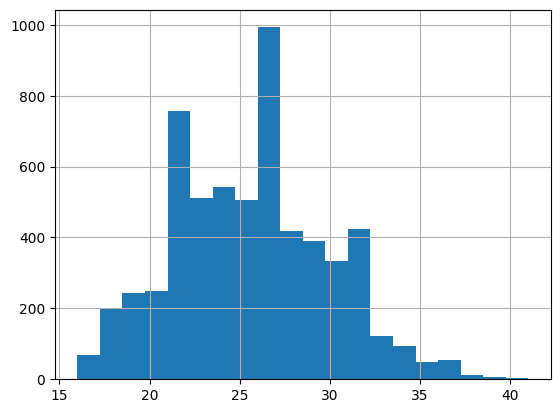

In [ ]:
# Se analizrán las estadísticas básicas de la edad y la distribución
print(df_consolidated['age'].describe())
df_consolidated['age'].hist(bins=20)

Se observa como la media de edad es en los 25,5 años, que la mayoría de jugadoras están entre 21/22 hasta 26/27 años. Y que hay algunas jugadoras mayores de 36 años, aunque son muy pocas

In [ ]:
edad_por_liga = df_consolidated.groupby('league_name_x')['age'].mean().sort_values(ascending=False)
edad_por_equipo = df_consolidated.groupby('team_name')['age'].mean().sort_values(ascending=False)

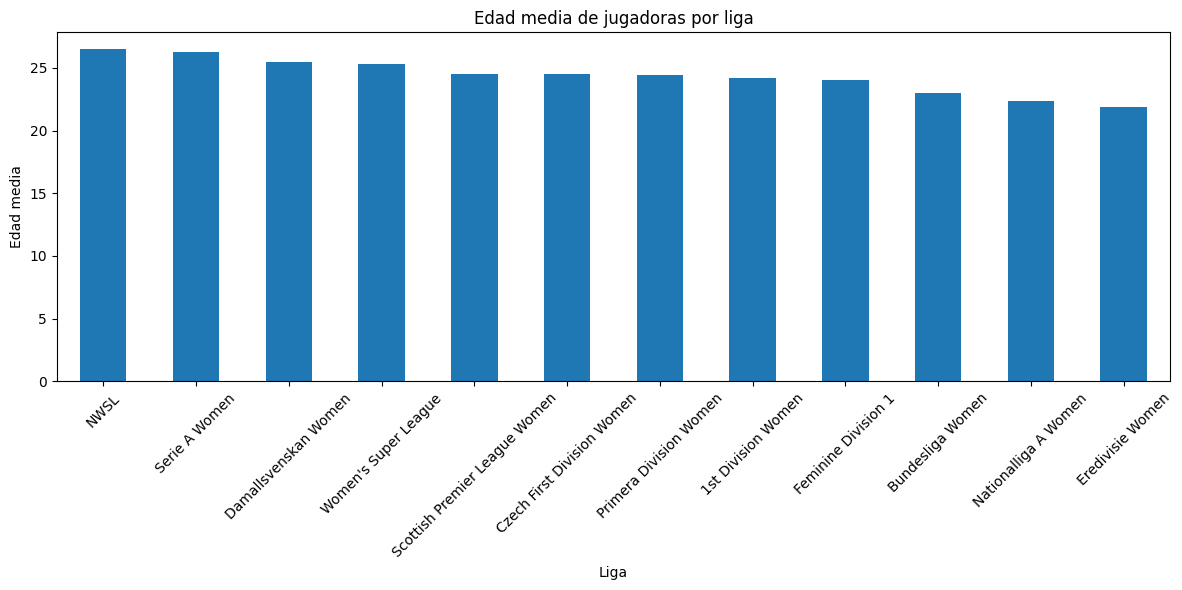

In [ ]:
plt.figure(figsize=(12, 6))
edad_por_liga.plot(kind='bar')

plt.title('Edad media de jugadoras por liga')
plt.xlabel('Liga')
plt.ylabel('Edad media')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# En este gráfico se muestra la diferencia de la media de las edades de las jugadores entre las distintas ligas

In [ ]:
# Se observa como hay una diferencia sustancial en la edad media de las jugadoras entre los distintos equipos equipos
edad_por_equipo

,age
team_name,
NJ/NY Gotham W,28.888889
Angel City W,27.259259
Portland Thorns W,26.653846
UDG Tenerife W,26.576923
Reading W,26.571429
...,...
SGS Essen W,22.153846
Ajax W,21.846154
RB Leipzig W,21.720000


<Axes: >

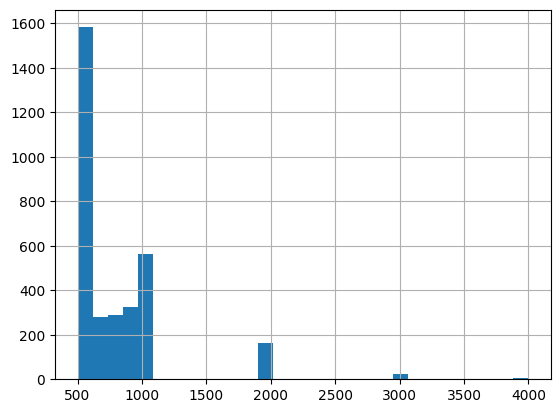

In [ ]:
# A continuación se analizará si hay salarios más comunes mediante un histograma
df_consolidated['wage_eur'].hist(bins=30)
# Se observa como la mayoría de salarios están entre 500 y 1100
# Se observa un número muy elevado de personas que tienen salarios cerca de 500

In [ ]:
# Igual que antes se analizará esto por equipos y ligas
salario_por_ligas = df_consolidated.groupby('league_name_x')['wage_eur'].mean().sort_values(ascending=False)
salario_por_equipos = df_consolidated.groupby('team_name')['wage_eur'].mean().sort_values(ascending=False)


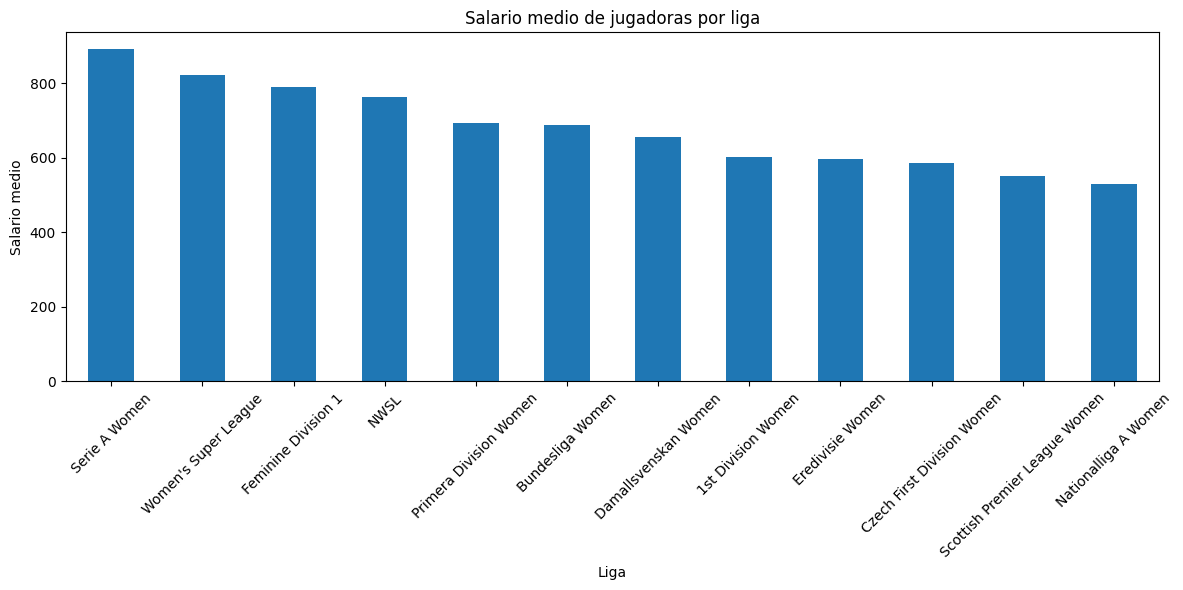

In [ ]:
plt.figure(figsize=(12, 6))
salario_por_ligas.plot(kind='bar')

plt.title('Salario medio de jugadoras por liga')
plt.xlabel('Liga')
plt.ylabel('Salario medio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# En este gráfico se muestra la diferencia de la media de las edades de las jugadores entre las distintas ligas
# Se observa una gran diferencia en el salario medio de las jugadoras de las distintas ligas

In [ ]:
salario_por_ligas.describe()
# Se aprecia una variabilidad moderada en los salarios entre las ligas (std = 115)

,wage_eur
count,12.000000
mean,681.095261
std,115.515524
min,529.629630
25%,593.615385
50%,672.141914
75%,770.936813
max,892.307692


Se obse

In [ ]:
# la diferencia por equipos es todavía mas significativa
salario_por_equipos

,wage_eur
team_name,
Barcelona W,1396.153846
Olympique Lyonnais W,1308.620690
Arsenal W,1181.914894
Chelsea W,1168.421053
Paris Saint Germain W,1158.695652
...,...
Zurich W,529.629630
RB Leipzig W,528.000000
Granada W,526.923077


In [ ]:
# Existe una brecha significativa entre equipos, algunos duplican el salario de otros equipos
salario_por_equipos.describe()
# Esta variable probablemente será muy significativa a la hora de establecer los salarios de las jugadoras

,wage_eur
count,74.000000
mean,718.381470
std,188.641549
min,500.000000
25%,586.239130
50%,678.333333
75%,777.884615
max,1396.153846


In [ ]:
# se analizará si la nacionalidad está relacionada
df_consolidated.groupby('nationality_name_x')['wage_eur'].mean().sort_values(ascending=False).head(10)
# Se observa como las jugadoras de chile son aquellas con un salario más elevado de media

,wage_eur
nationality_name_x,
Chile,1227.777778
Norway,1077.777778
North Macedonia,1000.000000
Zambia,1000.000000
Australia,998.214286
Argentina,950.000000
Netherlands,932.716049
Italy,927.500000
Canada,891.891892


In [ ]:
jugadoras_por_liga = df_consolidated['league_name_x'].value_counts()
jugadoras_por_liga
# Se observa que hay una gran diferencia entre ligas en el número de jugadoras

,count
league_name_x,
Women's Super League,1055
Feminine Division 1,944
Primera Division Women,376
NWSL,324
Bundesliga Women,303
1st Division Women,28
Nationalliga A Women,27
Serie A Women,26
Eredivisie Women,26


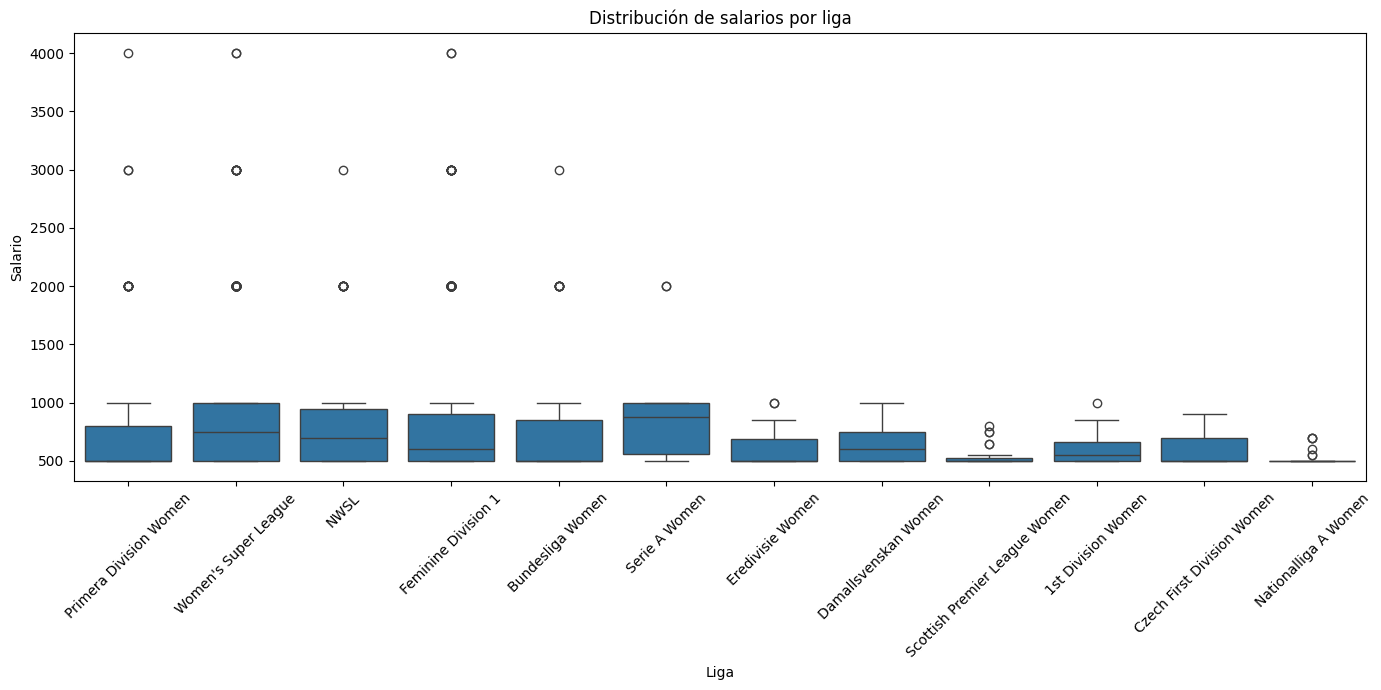

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df_consolidated, x='league_name_x', y='wage_eur')
plt.title('Distribución de salarios por liga')
plt.xlabel('Liga')
plt.ylabel('Salario')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Se observa como en la mayoría de divisiones hay algunas jugadoras con unos salarios muy por encima del resto

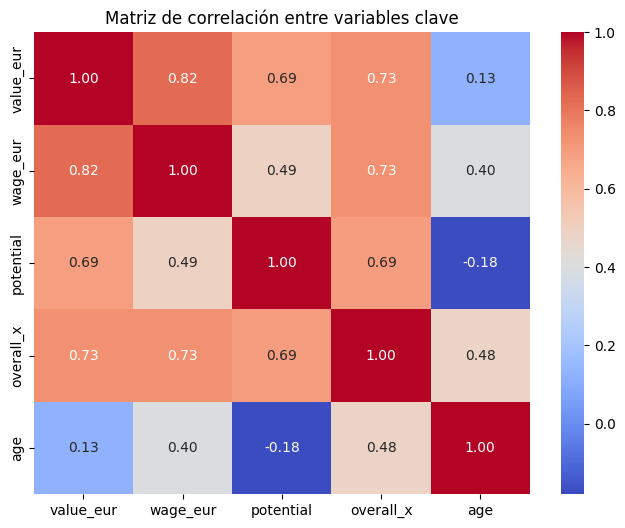

In [ ]:
# Se ha realizado una matriz de correlación con las variables que se han cosiderado clave, a la hora de determinar el salario
corr_vars = df_consolidated[['value_eur', 'wage_eur', 'potential', 'overall_x', 'age']]
corr_matrix = corr_vars.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables clave')
plt.show()
# Los resultados son que las variables clave a la hora de determinar el salario son el valor de la jugadora y el overall, que se intuye que es una media de todas sus estadísticas


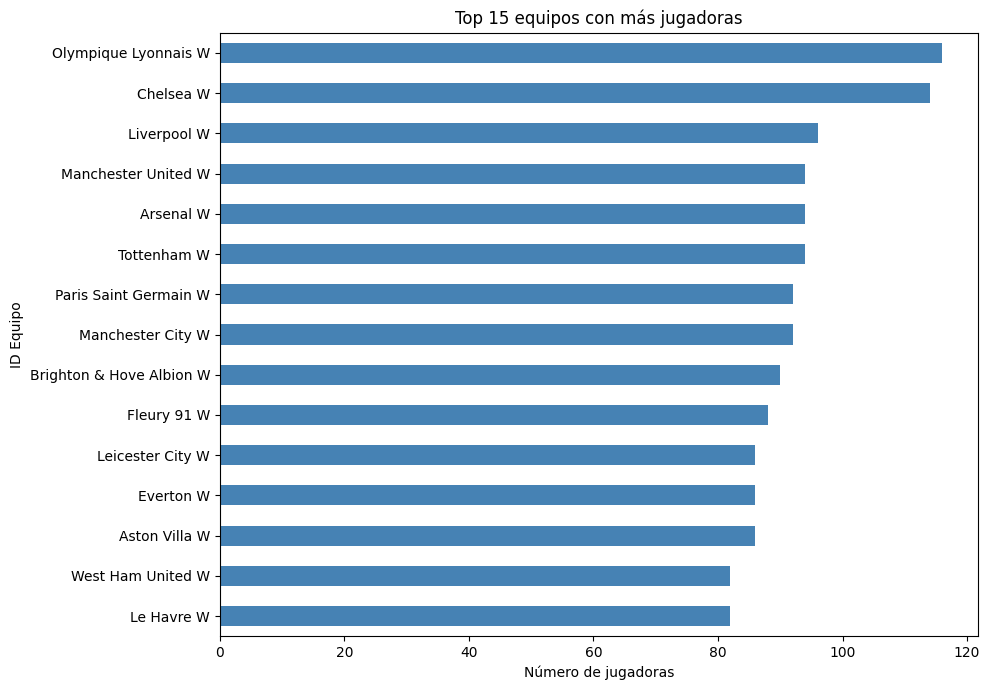

In [ ]:
# A continuación se muestran los 15 equipos con un mayor número de jugadoras
top_equipos = df_consolidated['team_name'].value_counts().head(15)
top_equipos.plot(kind='barh', figsize=(10,7), color='steelblue')
plt.title('Top 15 equipos con más jugadoras')
plt.xlabel('Número de jugadoras')
plt.ylabel('ID Equipo')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

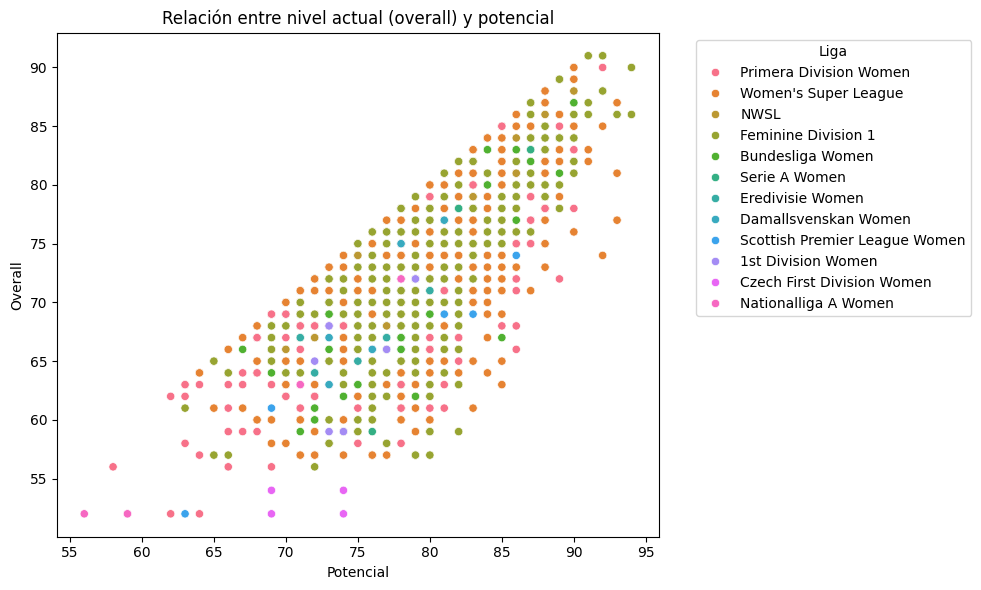

In [ ]:
# Se ha analizado la relación entre el overall y el potencial de las jugadoras
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_consolidated, x='potential', y='overall_x', hue='league_name_x')
plt.title('Relación entre nivel actual (overall) y potencial')
plt.xlabel('Potencial')
plt.ylabel('Overall')
plt.legend(title='Liga', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# Se observa una relación positiva entre el potencial de las jugadoras y el oveall

Con todo esto se ha contextualizado las ligas, los equipos y las jugadoras.
Se ha encontrado un claro patrón entre el overall de las jugadoras y su salario, también que hay una gran brecha salarial entre equipos, por lo tanto el equipo también es un factor clave a la hora de establecer el salario de las jugadoras.
Aquellos equipos con más jugadoras también se han detectado.

Una vez realizado el análisis exploratorio e identificadas aquellas características más relevantes, se procede a la preación de un primer modelo. Debido a que lo que se quiere predecir es el valor del salario, se utiliza la regresión lineal.

In [ ]:
#Obtenemos del conjunto de datos concretos aquellas variables que han sido identificadas como relevantes para la predicción del salario y la variable a predecir, el salario.
cols_relevantes = ['age', 'overall_x', 'potential', 'value_eur', 'international_reputation']
target = 'wage_eur'
#Debido a la existencia de valores pedidos, se eliminan de estos tados para evitar problemas en la elaboración de la regresión
df_clean = df_consolidated.dropna(subset=cols_relevantes + [target])

Ahora que las variables a utilizar ya están seleccionadas las variables y limpios los datos, se realiza la identificación de las variables independientes (x) y la variable dependiente (y). A continuación se realiza la división de estos datos en conjuntos de test y entrenamiento de ambos y se comprueba que esta división ha sido correctamente realizada.

In [ ]:
X = df_clean[cols_relevantes]
y = df_clean[target]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2259, 5)
(2259,)
(969, 5)
(969,)


A continuación se realiza el modelo de regresión lineal. Creandolo y entrenandolo con los datos de entrenamiento.

In [ ]:
from sklearn.linear_model import LinearRegression
modelpers=LinearRegression()
modelpers

LinearRegression()

In [ ]:
modelpers.fit(X_train, y_train)

LinearRegression()

In [ ]:
modelpers.intercept_

np.float64(87.83253705037373)

In [ ]:
modelpers.coef_

array([ 1.81762811e+01,  3.65637440e+00, -4.64145192e+00,  1.33177607e-05,
        1.06104409e+02])

Para una mejor interpretación de los resultados obtenemos los coeficientes redondeados de cada una de las variables.

In [ ]:
coeficientes=[]
for x in modelpers.coef_:
  coeficientes.append(round(x,2))

print(coeficientes)

[np.float64(18.18), np.float64(3.66), np.float64(-4.64), np.float64(0.0), np.float64(106.1)]


Creamos predicciones de este modelo utilizando los datos de entrenamiento, para poder valorar el funcionamiento y excatitud de este.

In [ ]:
y_pred=modelpers.predict(X_test)
y_pred

array([ 840.15329203,  393.10274659,  985.71923678,  413.10863166,
        570.61375534,  372.22609511,  617.7722864 , 1630.89905211,
        632.06137547,  493.55556008,  419.89604349,  587.11028916,
       2000.90515498, 1523.31711148,  411.34936479, 1204.40479442,
        853.25398428,  587.49715269,  890.73627587,  674.56343281,
        871.16238343,  565.57833147,  514.26131787,  672.24721554,
        443.45554562,  859.74080212,  965.41067826, 1306.24977374,
        522.26352807,  472.24650662,  571.33893636,  750.7884795 ,
        655.99762513,  636.40340224,  488.70478444,  863.88368599,
        487.58233209,  512.63011665,  603.48621028,  744.19363466,
        803.24069981,  783.16183927,  515.9941743 , 1288.1414921 ,
        909.35773801,  871.80036678,  738.5922484 , 1735.97269528,
        723.64392278,  549.26233966,  864.77138501,  610.87484369,
       1219.97293712,  429.0108872 , 1328.15042869,  992.35884688,
        551.79135054,  442.97921698, 1145.91481173,  518.91432

In [ ]:
coeficientespers=[round(x, 2) for x in modelpers.coef_]
coeficientes

[np.float64(18.18),
 np.float64(3.66),
 np.float64(-4.64),
 np.float64(0.0),
 np.float64(106.1)]

In [ ]:
variablespers =X.columns

Estos resultados también van a ser representados gráficamente para facilitar su comprensión e interpretación.

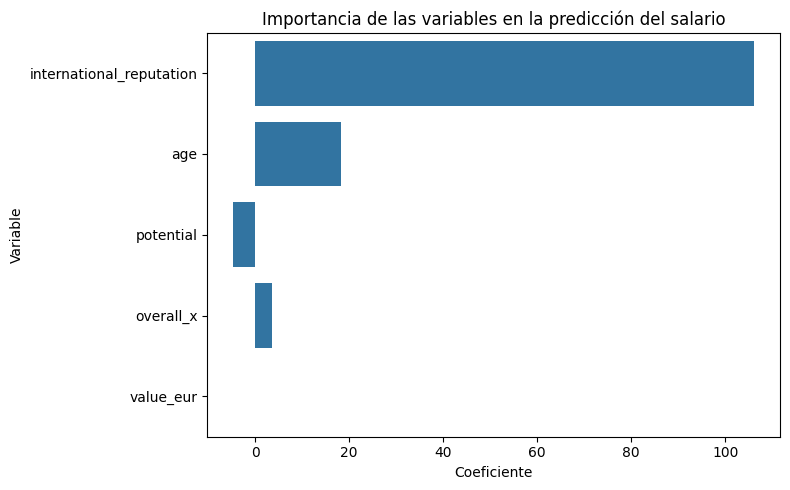

In [ ]:
coef_df = pd.DataFrame({'Variable': variablespers,'Coeficiente': coeficientespers})
plt.figure(figsize=(8, 5))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df.sort_values('Coeficiente', key=abs, ascending=False))
plt.title('Importancia de las variables en la predicción del salario')
plt.tight_layout()
plt.show()

A través de los coeficientes destacamos:
*   A mayor edad, el salario estimado aumenta, puesto que la relación que nos muestra el coeficiente es positiva, pero moderada.
*   Overall tiene una relación positiva con el salario, pero reducida, mientras que Potential tiene una relación negativa. Esto puede ser sorprendente, pero se puede deber a la posibilidad de que ambas variables estén muy relacionadas, lo cual puede generar problemas en el modelo en cuanto a coeficientes o signos de estos se refiere, lo que dificulta su interpretabilidad.
*   El valor de la jugadora no afecta a su salario.
*   La variable con el coeficiente más destacable es International_reputation. Esta cuenta con una relación fuerte y positiva, así, cada punto adicional de reputación internacional aumenta el salario en 106.1 euros. Podemos suponer que esto se debe a que una mayor reputación está relacionada con mayor experiencia y visibilidad de la jugadora.








In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_test, y_pred)

124.07212725541899

In [ ]:
mean_squared_error(y_test, y_pred)

38701.07953178772

A través de los valores de estas medidas sabemos que el modelo es útil y ofrece predicciones bastante certeras y cernacas a la realidad.

Una vez elaborado y valorado el modelo basado en características de las jugadoras, ahora se va a elaborar un segundo modelo basado en los diferentes clubes.

Igual que en el caso anterior se seleccionan las variables, se limpian los datos y se realiza la división en variables dependientes e independientes. En este caso, puesto que la variable independeinte que se va a utilizar, 'team_name', es categórica, es necesario cosificarla para transofrmarla en numeracia, puesto que el modelo de regeresión lineal que se va a utilizar nuevamente solo admite variables numericas.

In [ ]:
cols_team = ['team_name']
target = 'wage_eur'
df_team_clean = df_consolidated.dropna(subset=cols_team + [target])

In [ ]:
Xteam = df_team_clean[cols_team]
yteam = df_team_clean[target]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_x = encoder.fit_transform(Xteam)
encoded_df = pd.DataFrame(encoded_x, columns=encoder.get_feature_names_out())

In [ ]:
from sklearn.model_selection import train_test_split
X_train_team, X_test_team, y_train_team, y_test_team=train_test_split(encoded_df, yteam, train_size=0.7, random_state=42)

In [ ]:
print(X_train_team.shape)
print(y_train_team.shape)
print(X_test_team.shape)
print(y_test_team.shape)

(2227, 73)
(2227,)
(955, 73)
(955,)


Una vez realizado lo mismo que en el modelo anterior, la división de datos en entrenamiento y test, se crea este segundo modelo.

In [ ]:
from sklearn.linear_model import LinearRegression
modelteam=LinearRegression()
modelteam

LinearRegression()

In [ ]:
modelteam.fit(X_train_team, y_train_team)

LinearRegression()

In [ ]:
modelteam.intercept_

np.float64(572.2222222222223)

In [ ]:
modelteam.coef_

array([124.20634921, 567.77777778, 218.45574388,  -5.55555556,
       154.24836601, 703.96825397,  46.82539683, 432.77777778,
        59.5959596 , 119.44444444, -12.22222222, 654.65277778,
       197.77777778,  45.01915709, -72.22222222, 180.40935673,
       136.26834382, 150.08547009,  90.93567251, -31.04575163,
       -53.80116959,  22.9390681 , 136.60130719, 172.77777778,
       -54.04040404, 221.11111111, 206.34920635,  13.07189542,
        56.34920635,  23.93162393, -24.85380117, 130.90277778,
       -52.22222222,  68.54700855,  -4.5751634 , 127.77777778,
       331.00358423, 243.44941957, 207.77777778, 233.33333333,
       130.90277778, -61.11111111, 143.40277778, 738.03418803,
        72.51461988, 621.42857143, 327.77777778, 263.49206349,
       -40.4040404 , 111.86868687, 148.36601307, -11.11111111,
       313.07189542,  -0.79365079, -52.99145299,  73.01587302,
       -22.22222222,  25.3968254 , -25.34722222, 342.48366013,
        47.00854701,  -1.16959064, -51.38888889,  16.76

Creamos predicciones de este modelo utilizando los datos de entrenamiento, para poder valorar el funcionamiento y excatitud de este.

In [ ]:
y_pred_team=modelteam.predict(X_test_team)
y_pred_team

array([ 571.05263158,  628.57142857,  691.66666667,  745.        ,
        900.        , 1226.875     ,  597.61904762,  619.23076923,
       1226.875     , 1140.        ,  631.81818182, 1140.        ,
        696.42857143,  691.66666667,  585.29411765,  815.67164179,
        617.24137931,  903.22580645, 1193.65079365,  815.67164179,
        903.22580645,  722.30769231,  745.53571429,  703.125     ,
        793.33333333,  752.63157895,  550.        ,  903.22580645,
        561.11111111,  520.83333333,  805.55555556,  900.        ,
       1226.875     , 1226.875     , 1140.        ,  520.83333333,
        778.57142857, 1276.19047619,  715.625     ,  708.49056604,
       1140.        ,  567.64705882,  550.        ,  691.66666667,
        900.        ,  903.22580645,  645.23809524,  780.        ,
        585.29411765,  835.71428571,  596.15384615,  617.24137931,
        526.31578947, 1226.875     ,  519.23076923,  520.        ,
        526.31578947, 1226.875     ,  745.53571429,  566.66666

Para una mejor interpretación de los resultados obtenemos los coeficientes redondeados de cada una de las variables.

In [ ]:
coeficientesteam = []
for x in modelteam.coef_:
    coeficientesteam.append(round(x, 2))

print(coeficientesteam)


[np.float64(124.21), np.float64(567.78), np.float64(218.46), np.float64(-5.56), np.float64(154.25), np.float64(703.97), np.float64(46.83), np.float64(432.78), np.float64(59.6), np.float64(119.44), np.float64(-12.22), np.float64(654.65), np.float64(197.78), np.float64(45.02), np.float64(-72.22), np.float64(180.41), np.float64(136.27), np.float64(150.09), np.float64(90.94), np.float64(-31.05), np.float64(-53.8), np.float64(22.94), np.float64(136.6), np.float64(172.78), np.float64(-54.04), np.float64(221.11), np.float64(206.35), np.float64(13.07), np.float64(56.35), np.float64(23.93), np.float64(-24.85), np.float64(130.9), np.float64(-52.22), np.float64(68.55), np.float64(-4.58), np.float64(127.78), np.float64(331.0), np.float64(243.45), np.float64(207.78), np.float64(233.33), np.float64(130.9), np.float64(-61.11), np.float64(143.4), np.float64(738.03), np.float64(72.51), np.float64(621.43), np.float64(327.78), np.float64(263.49), np.float64(-40.4), np.float64(111.87), np.float64(148.37),

In [ ]:
variablesteam = encoded_df.columns

Igual que en el caso anterior, estos  resultados son representados gráficamente para facilitar su comprensión e interpretación.

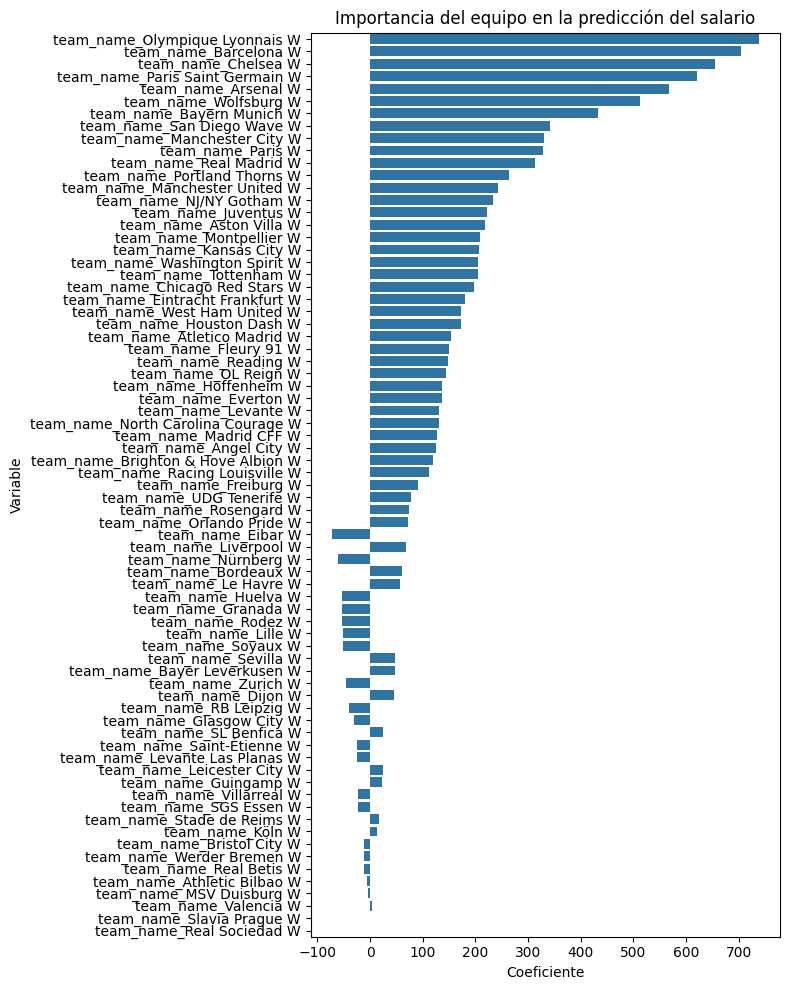

In [ ]:
coef_df_team = pd.DataFrame({'Variable': variablesteam,'Coeficiente': coeficientesteam})
plt.figure(figsize=(8, 10))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df_team.sort_values('Coeficiente', key=abs, ascending=False))
plt.title('Importancia del equipo en la predicción del salario')
plt.tight_layout()
plt.show()

A través de los coeficientes podemos obervar como estar en clubes grandes, como el Barcelona, el Paris Saint Germain o el Chelsea con salarios significativamente mayores. De la misma forma, los clubes más pequeños, como el Eibar, el Huelva o el Soyaux, se asocian con salarios más bajos. De esta forma se solidifica lo indicado con anterioridad:
hay una gran brecha salarial entre equipos, por lo tanto el equipo es un factor clave a la hora de establecer el salario de las jugadoras.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test_team, y_pred_team)

236.5562575547906

In [ ]:
mean_squared_error(y_test_team, y_pred_team)

131684.49779006222

Utilizando las predicciones realizadas con el modelo y comparandolas con los datos de entrenamiento, podemos obervar como el modelo cuenta con errores moderados, por lo que es bastante preciso. Sin embargo, el modelo anterior, en el que se utilizan características personales, otorga mejores resultados.

Teniendo en cuenta los modelos elaborados, podemos decir que el modelo basado en las características de las jugadoras es más preciso, sin embargo, no se puede dejar de lado el modelo basado en los clubes, puesto que sus resultados son razonablemente buenos y refleja de forma clara las diferencias en salarios.

Así, un primer elemento sería la creación y promoción de políticas especificas que regulen los salarios, buscando evitar elevadas diferencias basadas en factores como el club. Es decir, que los salarios vengan dados por méritos y habilidades reales y no por las capacidades económicas de cada club.

En una línea similar, sería interesante promover la creación y retención de talento en clubes de menor tamaño. Por una parte, creando oportunidades de formación y desarrollo de habilidades personales de las jugadoras en clubes con menores capacidades económicas, buscando evitar una brecha salarial basada en el talento que se fundamente en la falta o imposibilidad de desarrollo de estas habilidades debido a la situación económica del club. Además, esta iniciativa también se centra en el desarrollo de talento local y la creación de nuevas oportunidades para las jugadoras. Por otro lado, esto supone de cierta forma que las subvenciones se enfoquen principalmente en clubs más pequeños y con una estructura financiera más débil, buscando que estos puedan ofrecer también salarios competitivos, facilitando la retención de talento y evitando la concentración de talento el clubs más grandes.

Otras opciones que pueden ser útiles para evitar problemáticas salariales  incluyen la cesión de jugadoras de equipos grandes a pequeños, ya sean obligadas o incentivadas. Se busca así que los equipos con menores recursos tengan acceso a talento formado.

Se puede hablar también de la implementación de un techo salarial. Con esta medida se busca promover la competitividad al limitar las cantidades gastadas en salarios por parte de los equipos. Esta medida también ayudaría a evitar la acumulación de talento debido a las fuertes diferencias salariales.


Cabe destacar que estas medidas deben ser aplicadas y asimiladas de forma conjunta por las instituciones y los clubes, buscando un trabajo colaborativo para su aplicación.
